# IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# LOADING THE CSV FILE

* Our CSV file is "dataset_main.csv" 

In [77]:
df = pd.read_csv("dataset_main.csv")

# CHECKING OUR DATASET

In [78]:
df.head(5) 

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Unnamed: 15,Unnamed: 16
0,01-01-2022,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,NaN,NaN
1,01-01-2022,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,NaN,NaN
2,01-01-2022,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,NaN,NaN
3,01-01-2022,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,NaN,NaN
4,01-01-2022,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,NaN,NaN


# CHECKING IF THERE IS ANY IRRELEVANT VALUE

* using isnull ( ) : to find null values in dataset.
* using sum ( ) : for including all dataset.

In [79]:
df.isnull().sum()

Date                    0
Store ID                0
Product ID              0
Category                0
Region                  0
Inventory Level         0
Units Sold              0
Units Ordered           0
Demand Forecast         0
Price                   0
Discount                0
Weather Condition       0
Holiday/Promotion       0
Competitor Pricing      0
Seasonality             0
Unnamed: 15           999
Unnamed: 16           999
dtype: int64

# DROPPING EXTRA COLUMNS FROM DATASET

In [80]:
df.drop(columns=["Unnamed: 15","Unnamed: 16"],axis=0 ,inplace=True)
df.drop(columns=["Date"],axis=0 ,inplace=True)

In [81]:
df.isnull().sum()

Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [82]:
# USING DESCRIBE( ) FUNCTION 

df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,275.302302,136.046046,109.846847,140.938438,56.695385,9.814815,0.497497,56.640220
std,127.754033,104.695531,53.339214,105.240013,25.656417,7.056226,0.500244,25.804198
min,50.000000,0.000000,20.000000,-8.370000,10.060000,0.000000,0.000000,7.600000
25%,170.000000,51.500000,65.000000,54.865000,34.420000,5.000000,0.000000,34.590000
50%,271.000000,107.000000,110.000000,113.330000,57.840000,10.000000,0.000000,57.580000
75%,388.000000,203.000000,157.000000,207.415000,80.035000,15.000000,1.000000,79.595000
max,499.000000,480.000000,200.000000,480.660000,99.920000,20.000000,1.000000,104.060000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Store ID            999 non-null    object 
 1   Product ID          999 non-null    object 
 2   Category            999 non-null    object 
 3   Region              999 non-null    object 
 4   Inventory Level     999 non-null    int64  
 5   Units Sold          999 non-null    int64  
 6   Units Ordered       999 non-null    int64  
 7   Demand Forecast     999 non-null    float64
 8   Price               999 non-null    float64
 9   Discount            999 non-null    int64  
 10  Weather Condition   999 non-null    object 
 11  Holiday/Promotion   999 non-null    int64  
 12  Competitor Pricing  999 non-null    float64
 13  Seasonality         999 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 109.4+ KB


# CHECKING IF THERE IS ANY DUPLICATES

In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
df.info

<bound method DataFrame.info of     Store ID Product ID     Category Region  Inventory Level  Units Sold  \
0       S001      P0001    Groceries  North              231         127   
1       S001      P0002         Toys  South              204         150   
2       S001      P0003         Toys   West              102          65   
3       S001      P0004         Toys  North              469          61   
4       S001      P0005  Electronics   East              166          14   
..       ...        ...          ...    ...              ...         ...   
994     S005      P0015    Furniture   West              494         300   
995     S005      P0016    Groceries   East              407         103   
996     S005      P0017    Furniture   East              308         266   
997     S005      P0018    Furniture  South              331         235   
998     S005      P0019  Electronics   East              481         154   

     Units Ordered  Demand Forecast  Price  Discount We

# GETTING NUMERICAL COLUMNS

In [86]:
#numerical_cols = df.select_dtypes(include=["float64","int64"]).columns
numerical_cols = df[['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing']]

In [87]:
numerical_cols

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
0,231,127,55,135.47,33.50,20,0,29.69
1,204,150,66,144.04,63.01,20,0,66.16
2,102,65,51,74.02,27.99,10,1,31.32
3,469,61,164,62.18,32.72,10,1,34.74
4,166,14,135,9.26,73.64,0,0,68.95
...,...,...,...,...,...,...,...,...
994,494,300,31,311.48,61.44,0,0,60.36
995,407,103,90,107.56,60.15,15,1,64.52
996,308,266,164,259.60,31.07,20,1,30.57
997,331,235,49,234.25,22.58,20,1,27.56


In [88]:
cat_cols=df[['Category', 'Region', 'Weather Condition', 'Holiday/Promotion', 'Seasonality']]

In [89]:
cat_cols

,Category,Region,Weather Condition,Holiday/Promotion,Seasonality
0,Groceries,North,Rainy,0,Autumn
1,Toys,South,Sunny,0,Autumn
2,Toys,West,Sunny,1,Summer
3,Toys,North,Cloudy,1,Autumn
4,Electronics,East,Sunny,0,Summer
...,...,...,...,...,...
994,Furniture,West,Sunny,0,Winter
995,Groceries,East,Sunny,1,Winter
996,Furniture,East,Rainy,1,Summer
997,Furniture,South,Cloudy,1,Summer


In [90]:
#encode cat_cols
enc_cols=pd.get_dummies(data=cat_cols,columns=['Category', 'Region', 'Weather Condition', 'Seasonality'],drop_first=True,dtype=int)


In [91]:
enc_cols

,Holiday/Promotion,Category_Electronics,Category_Furniture,Category_Groceries,Category_Toys,Region_North,Region_South,Region_West,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,1,0,0,1,0,1,0
3,1,0,0,0,1,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,1,0,0,0,0,1,0,0,1,0,0,1
995,1,0,0,1,0,0,0,0,0,0,1,0,0,1
996,1,0,1,0,0,0,0,0,1,0,0,0,1,0
997,1,0,1,0,0,0,1,0,0,0,0,0,1,0


In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler =StandardScaler()

In [94]:
scaled = scaler.fit_transform(numerical_cols)

In [95]:
scaled

array([[-0.34695181, -0.08644664, -1.02878004, ...,  1.44415543,
        -0.99500746, -1.04493536],
       [-0.55840128,  0.13334803, -0.82244948, ...,  1.44415543,
        -0.99500746,  0.36910847],
       [-1.35721043, -0.67893663, -1.10380933, ...,  0.02625737,
         1.00501759, -0.98173571],
       ...,
       [ 0.25607078,  1.2418777 ,  1.0157682 , ...,  1.44415543,
         1.00501759, -1.0108153 ],
       [ 0.43619441,  0.9456327 , -1.14132398, ...,  1.44415543,
         1.00501759, -1.12752142],
       [ 1.61091374,  0.17157319,  1.10955482, ..., -0.68269166,
        -0.99500746,  1.00730867]], shape=(999, 8))

In [96]:
scaled_df=pd.DataFrame(scaled,columns=['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing'])

In [97]:
data = pd.concat([scaled_df,enc_cols],axis=1)

In [98]:
data

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Holiday/Promotion,Category_Electronics,...,Category_Toys,Region_North,Region_South,Region_West,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,-0.346952,-0.086447,-1.028780,-0.051988,-0.904530,1.444155,-0.995007,-1.044935,0,0,...,0,1,0,0,1,0,0,0,0,0
1,-0.558401,0.133348,-0.822449,0.029486,0.246246,1.444155,-0.995007,0.369108,0,0,...,1,0,1,0,0,0,1,0,0,0
2,-1.357210,-0.678937,-1.103809,-0.636183,-1.119399,0.026257,1.005018,-0.981736,1,0,...,1,0,0,1,0,0,1,0,1,0
3,1.516936,-0.717162,1.015768,-0.748745,-0.934947,0.026257,1.005018,-0.849133,1,0,...,1,1,0,0,0,0,0,0,0,0
4,-0.855997,-1.166307,0.471806,-1.251847,0.660774,-1.391641,-0.995007,0.477285,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1.712723,1.566792,-1.478956,1.621313,0.185022,-1.391641,-0.995007,0.144226,0,0,...,0,0,0,1,0,0,1,0,0,1
995,1.031386,-0.315798,-0.372274,-0.317324,0.134717,0.735206,1.005018,0.305521,1,0,...,0,0,0,0,0,0,1,0,0,1
996,0.256071,1.241878,1.015768,1.128098,-0.999291,1.444155,1.005018,-1.010815,1,0,...,0,0,0,0,1,0,0,0,1,0
997,0.436194,0.945633,-1.141324,0.887099,-1.330368,1.444155,1.005018,-1.127521,1,0,...,0,0,1,0,0,0,0,0,1,0


<Axes: >

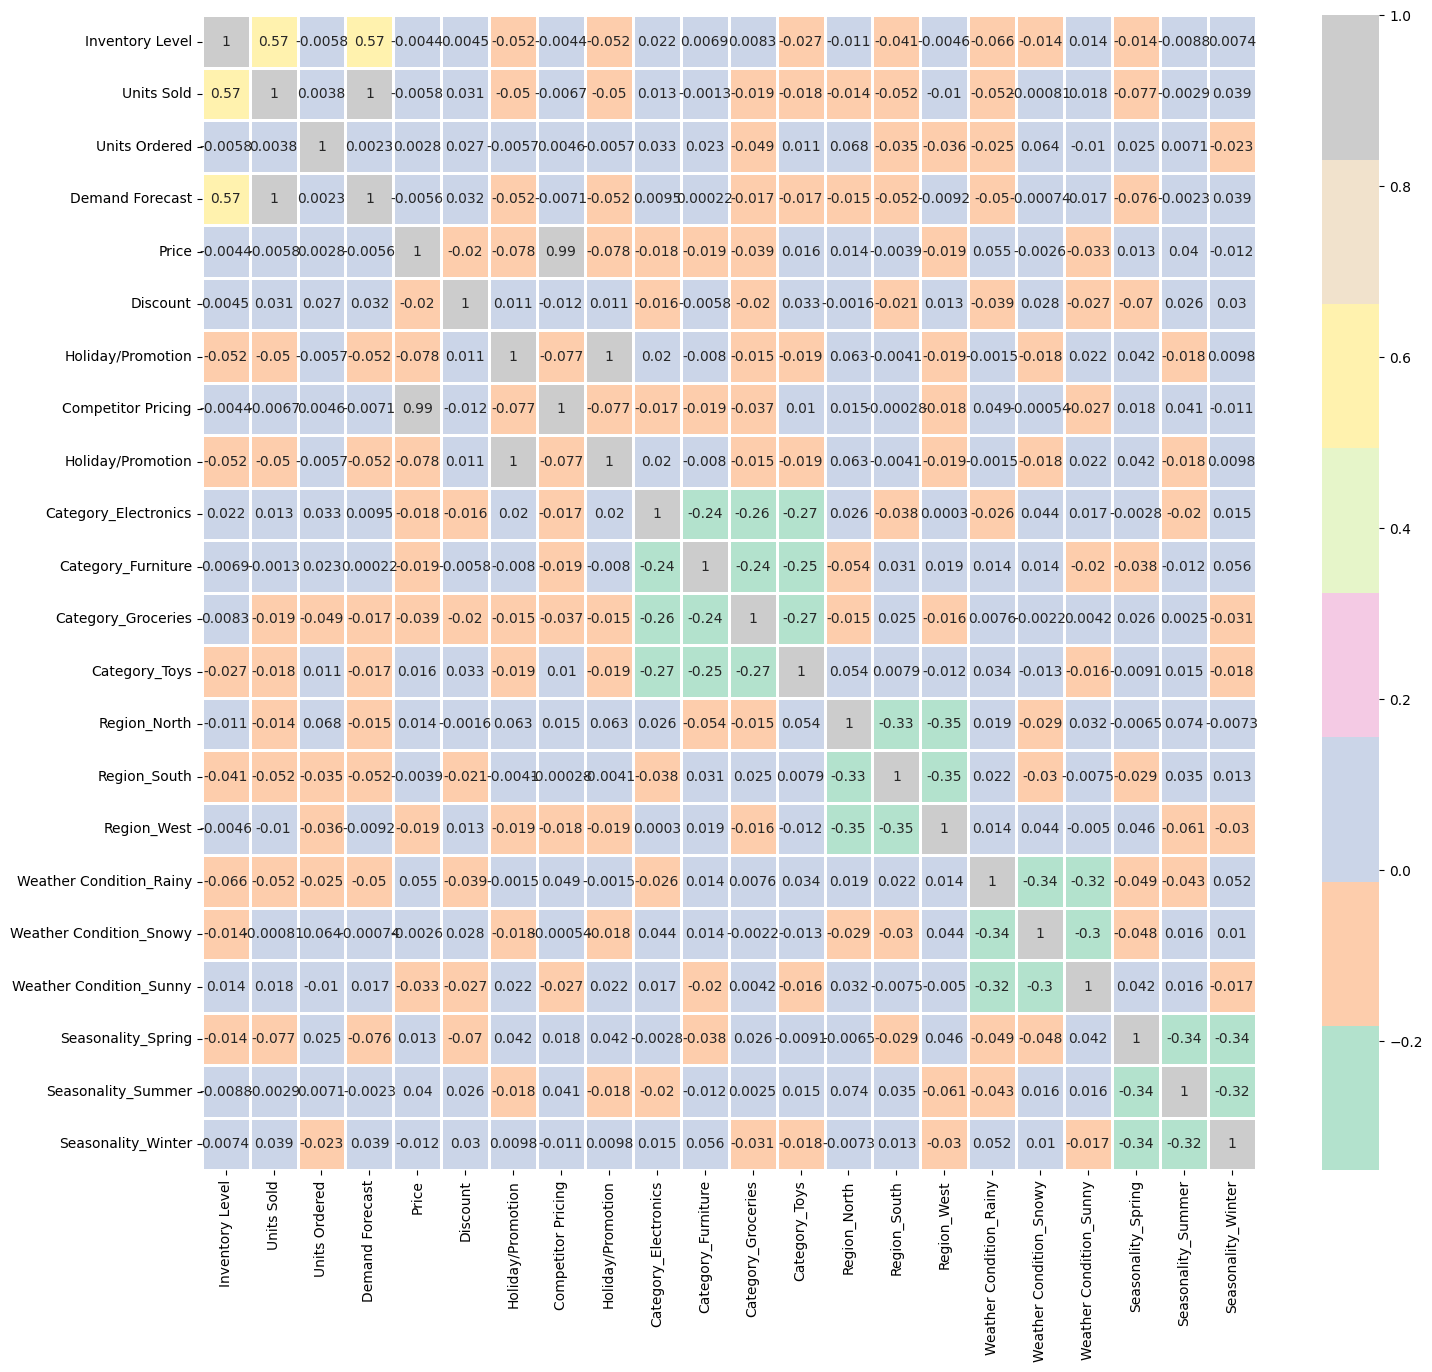

In [99]:
#correlation
plt.figure(figsize=(17,15))
sns.heatmap(data.corr(),annot=True,cmap='Pastel2', linewidths=2)

In [100]:
outlier_col=df[['Units Sold','Demand Forecast']]
for col in outlier_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]

    # Optional: Reset index after each loop to avoid index misalignment
    df.reset_index(drop=True, inplace=True)

In [101]:
data.columns

Index(['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing',
       'Holiday/Promotion', 'Category_Electronics', 'Category_Furniture',
       'Category_Groceries', 'Category_Toys', 'Region_North', 'Region_South',
       'Region_West', 'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny', 'Seasonality_Spring', 'Seasonality_Summer',
       'Seasonality_Winter'],
      dtype='object')

In [102]:
X=data[['Inventory Level','Demand Forecast','Price',  'Competitor Pricing', 'Holiday/Promotion',
       'Category_Electronics', 'Category_Furniture', 'Category_Groceries',
       'Category_Toys', 'Region_North', 'Region_South', 'Region_West',
       'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny', 'Seasonality_Spring', 'Seasonality_Summer',
       'Seasonality_Winter']]

In [103]:
y=data['Units Sold']

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
model= LinearRegression()

In [108]:
model.fit(X_train,y_train)

LinearRegression()

In [109]:
y_pred= model.predict(X_test) #pred
y_pred

array([ 2.92790968e-01,  1.06429493e-01,  2.42241233e+00, -4.32888196e-01,
       -4.93386359e-01, -8.06604838e-01, -8.63357269e-01, -9.12845983e-01,
        2.03460670e+00,  1.74285310e-01,  3.58017360e-01, -9.90985470e-01,
        4.37729394e-01, -8.88065470e-01, -7.28872350e-01, -1.22172232e+00,
        3.06727116e-01, -1.12242395e+00, -8.65667348e-01, -1.09856432e+00,
       -6.50463912e-01,  1.04954047e-01,  1.04165688e-01, -1.01613000e+00,
       -5.19018866e-01, -8.62140827e-01,  1.99075888e+00, -1.00109732e+00,
        6.76983898e-01, -1.27281728e+00, -6.52991399e-01,  1.11699603e+00,
       -4.03227355e-01,  7.32859941e-03,  3.90317303e-01,  2.50697584e-01,
       -5.13971271e-01,  6.35581574e-01, -1.09945745e+00,  3.00584767e-01,
        4.45930553e-01, -1.21318576e+00, -3.59974854e-01,  1.97093861e+00,
       -6.99013509e-01, -1.02482169e+00,  3.38202352e-01,  3.70401545e-01,
        9.55783135e-01, -2.75844313e-01, -8.83062726e-01,  1.41655567e+00,
        8.00341849e-02, -

In [110]:
y_test


517    0.381812
870    0.190686
839    2.436414
274   -0.487811
325   -0.526036
         ...   
908    0.018673
868    1.088977
964   -1.042076
4     -1.166307
151   -1.290539
Name: Units Sold, Length: 200, dtype: float64

In [111]:
from sklearn.metrics import mean_absolute_error,r2_score


In [112]:
mean_absolute_error(y_test,y_pred)

0.0673966381354505

In [113]:
r2_score(y_test,y_pred)*100

99.4394256070742